첫번째 핸즈온은 비트플립 노이즈를 회로의 모든 게이트에 인가

In [1]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

import boto3
from braket.aws import AwsDevice
from braket.circuits import Circuit, Noise
from braket.devices import LocalSimulator

In [2]:
# 노이즈 시뮬레이터 디바이스 선택
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/dm1")

In [3]:
# 간단한 양자 회로(GHZ) 생성
#circuit = Circuit().h(0).cnot(0, 1)
circuit = Circuit().h(0).cnot(0, 1).cnot(0, 2)

In [4]:
print(circuit)

T  : │  0  │  1  │  2  │
      ┌───┐             
q0 : ─┤ H ├───●─────●───
      └───┘   │     │   
            ┌─┴─┐   │   
q1 : ───────┤ X ├───┼───
            └───┘   │   
                  ┌─┴─┐ 
q2 : ─────────────┤ X ├─
                  └───┘ 
T  : │  0  │  1  │  2  │


BitFlip 노이즈 모델을 생성

확률 0.1(10%)로 비트 플립이 발생하도록 설정

생성된 노이즈 모델을 회로의 모든 게이트에 적용

In [5]:
#BitFlip 노이즈 모델을 생성
noise = Noise.BitFlip(probability=0.1)

#생성된 노이즈 모델을 회로의 모든 게이트에 적용
circuit.apply_gate_noise(noise)

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(2)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': B

In [6]:
print(circuit)

T  : │        0        │        1        │        2        │
      ┌───┐ ┌─────────┐       ┌─────────┐       ┌─────────┐ 
q0 : ─┤ H ├─┤ BF(0.1) ├───●───┤ BF(0.1) ├───●───┤ BF(0.1) ├─
      └───┘ └─────────┘   │   └─────────┘   │   └─────────┘ 
                        ┌─┴─┐ ┌─────────┐   │               
q1 : ───────────────────┤ X ├─┤ BF(0.1) ├───┼───────────────
                        └───┘ └─────────┘   │               
                                          ┌─┴─┐ ┌─────────┐ 
q2 : ─────────────────────────────────────┤ X ├─┤ BF(0.1) ├─
                                          └───┘ └─────────┘ 
T  : │        0        │        1        │        2        │


In [7]:
result = device.run(circuit, shots=1000).result()
counts = result.measurement_counts
# print counts
print(counts)

Counter({'000': 337, '111': 326, '010': 79, '101': 65, '100': 54, '011': 53, '001': 44, '110': 42})


In [8]:
# 결과 출력
print(result.measurement_counts)

Counter({'000': 337, '111': 326, '010': 79, '101': 65, '100': 54, '011': 53, '001': 44, '110': 42})


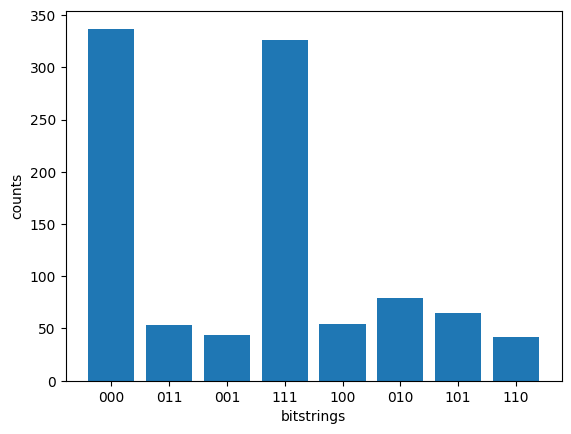

In [9]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');